**Load essential Libraries and data**

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


**Load and prepare data**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the data to understand its structure
print("Original Training Data Shape:", x_train.shape)
print("Original Training Labels Shape:", y_train.shape)
print("Original Test Data Shape:", x_test.shape)
print("Original Test Labels Shape:", y_test.shape)

Original Training Data Shape: (60000, 28, 28)
Original Training Labels Shape: (60000,)
Original Test Data Shape: (10000, 28, 28)
Original Test Labels Shape: (10000,)


**Explore the data**

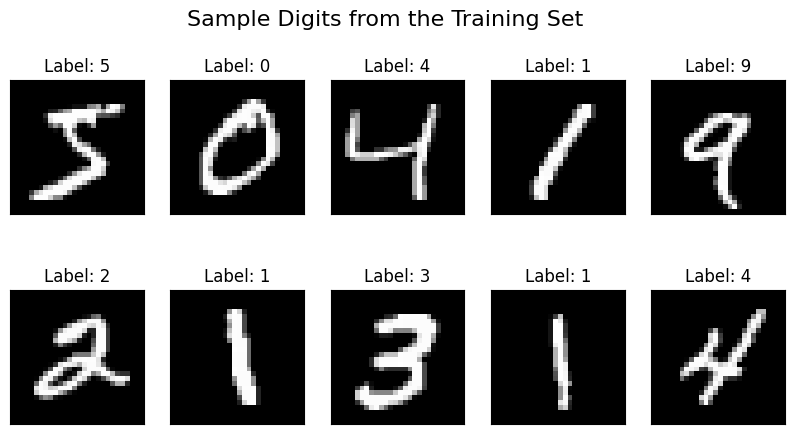

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.xticks([])
    plt.yticks([])
plt.suptitle("Sample Digits from the Training Set", fontsize=16)
plt.show()

**PreProcess the data**

In [6]:
# Normalize pixel values from [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to (num_samples, height, width, channels)
# For grayscale images, the channel is 1.
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the labels. For example, the label '5' becomes [0,0,0,0,0,1,0,0,0,0]
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Reshaped Training Data Shape:", x_train.shape)
print("One-Hot Encoded Training Labels Shape:", y_train_cat.shape)

Reshaped Training Data Shape: (60000, 28, 28, 1)
One-Hot Encoded Training Labels Shape: (60000, 10)


**Build the CNN**

In [7]:
model = Sequential([
    # Input Layer: A convolutional layer with 32 filters of size 3x3
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Pooling layer to reduce spatial dimensions
    MaxPooling2D(pool_size=(2, 2)),

    # Another convolutional layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),

    # Another pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the 2D arrays for the fully connected layers
    Flatten(),

    # A dense layer with 128 neurons
    Dense(128, activation='relu'),

    # Output layer with 10 neurons (one for each digit) and softmax activation
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [8]:
print("Training the model...")
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test_cat),
                    verbose=1)
print("Training finished!")

Training the model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - accuracy: 0.8661 - loss: 0.4611 - val_accuracy: 0.9799 - val_loss: 0.0594
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 106ms/step - accuracy: 0.9817 - loss: 0.0613 - val_accuracy: 0.9856 - val_loss: 0.0470
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.9876 - loss: 0.0385 - val_accuracy: 0.9869 - val_loss: 0.0369
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9913 - val_loss: 0.0289
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9934 - loss: 0.0221 - val_accuracy: 0.9906 - val_loss: 0.0298
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.9898 - val_loss: 0.0320
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 0.9906 - val_loss: 0.0336
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accura

**Evaluate the model**

In [9]:
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")


Test Accuracy: 99.09%
Test Loss: 0.0303


**Plotting accuracy and loss**

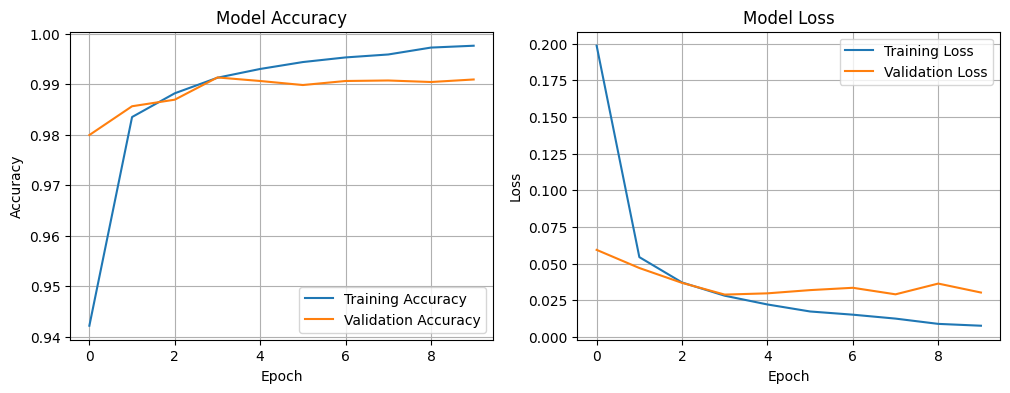

In [10]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

**Make Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


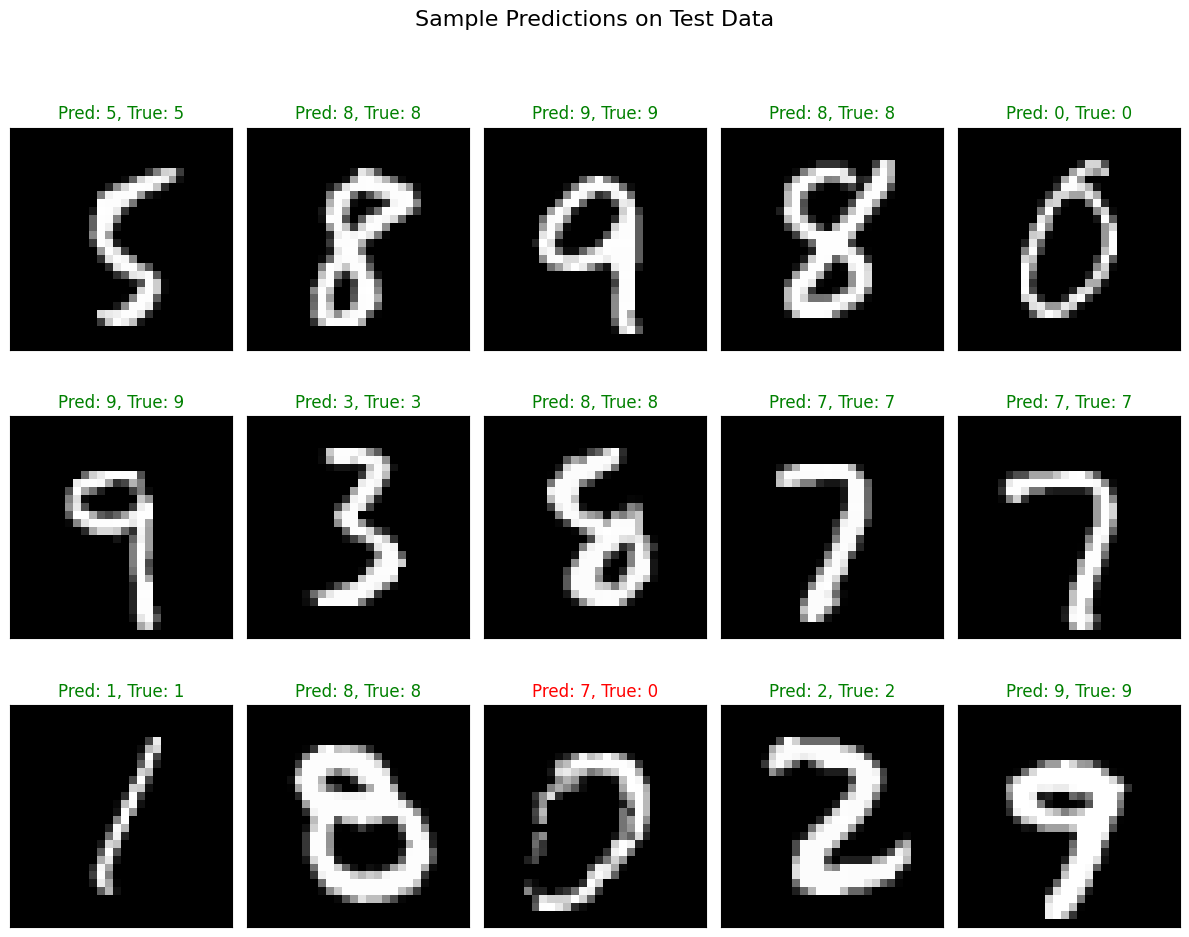

In [11]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Display a few random test images with their predicted and true labels
plt.figure(figsize=(12, 10))
for i in range(15):
    # Select a random index
    idx = np.random.randint(0, len(x_test))

    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')

    # Set the title color to green for correct predictions and red for incorrect
    title_color = 'green' if predicted_labels[idx] == y_test[idx] else 'red'
    plt.title(f"Pred: {predicted_labels[idx]}, True: {y_test[idx]}", color=title_color)

    plt.xticks([])
    plt.yticks([])

plt.suptitle("Sample Predictions on Test Data", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()